In [1]:
import numpy as np
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
import imageio

In [3]:
# Organizando os scans individuais de acordo com seus angulos
SCANSPATH = 'C:/Users/arthur/Mestrado/blender_tomo/scans/test0'
SCANS = {int(file.split('.')[0]):file for file in os.listdir(SCANSPATH)}
print(f"Número de angulos: {len(SCANS)}")

Número de angulos: 180


In [6]:
projection_size = np.asarray(Image.open(os.path.join(SCANSPATH, SCANS[0])).convert('L')).shape[1]

In [7]:
projection_size

960

In [13]:
# Visualiza as projeções unidas
def ordered_angles(scans = SCANS, use_log = False):
    b_scan = np.zeros((len(scans), projection_size))
    i = 0
    for scan in sorted(scans.keys()):
        a_scan = np.asarray(Image.open(os.path.join(SCANSPATH, scans[scan])).convert('L'))
        if use_log:
            a_scan = np.log(255/a_scan)
        b_scan[i, :] = a_scan[a_scan.shape[0]//2, :]
        i += 1
    return b_scan

In [14]:
sinogram = ordered_angles()
sinogram_log = ordered_angles(use_log=True)

Text(0.5, 1.0, 'Log Sinogram')

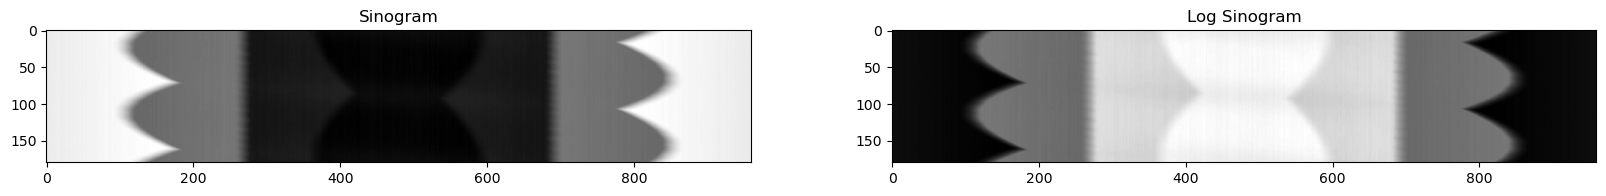

In [32]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Display the images
axs[0].imshow(sinogram, cmap='gray')
axs[0].set_title('Sinogram')
axs[1].imshow(sinogram_log, cmap='gray')
axs[1].set_title('Log Sinogram')

In [17]:
# Definindo uma função de reconstrução geral
# Ela itera sobre cada um dos scans unicos e as soma para criar a imagem final
def reconstruct_from_sinogram(sinogram = sinogram, samples = 180, N = 960, filter = False, make_gif = False):
    final_image = int(np.ceil(N * np.sqrt(2)))
    b_scan = np.zeros((final_image, final_image))
    for scan in range(len(sinogram)):
        a_scan = sinogram[scan]
        if filter:
            a_scan
            H = 1
            a_scan = a_scan * H

        a_scan = np.tile(a_scan, (sinogram.shape[1], 1))
        a_scan = Image.fromarray(a_scan).rotate(45, expand=True)
        a_scan = np.asarray(a_scan.rotate(-45+scan))
        b_scan += a_scan

        Image.fromarray(b_scan/np.max(b_scan)*255).convert('L').save(f"./test/{scan}.png")
    print(np.unique(b_scan))
    return b_scan    

[    0.   300.   301. ... 21523. 21524. 21528.]


In [33]:
img_reconstructed = reconstruct_from_sinogram()
log_reconstructed = reconstruct_from_sinogram(sinogram=sinogram_log)

[    0.   300.   301. ... 21523. 21524. 21528.]
[  0.           1.03476608   1.04136676 ... 260.75341225 260.7725786
 260.8056637 ]


Text(0.5, 1.0, 'Log Image')

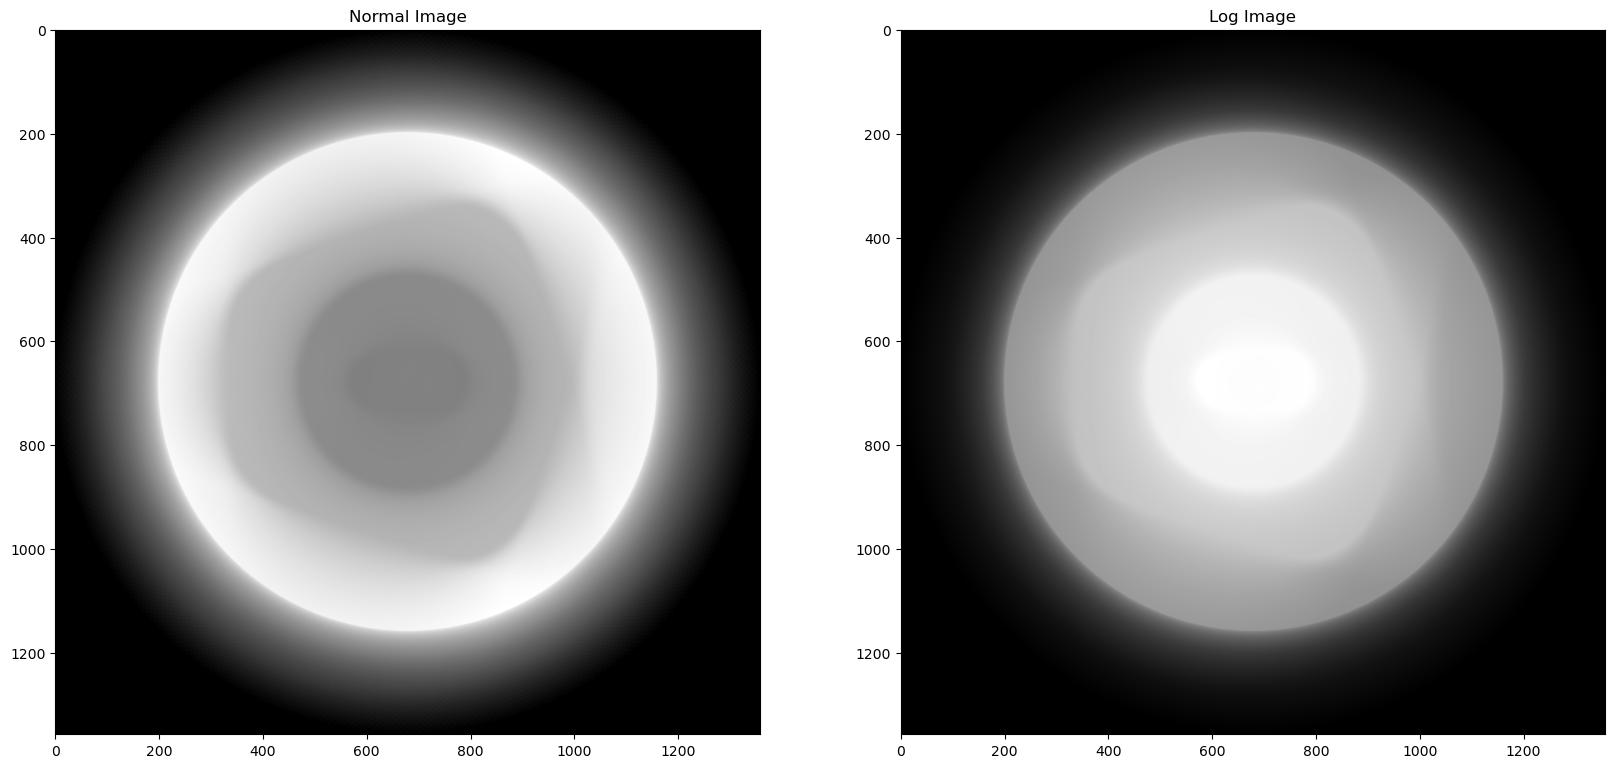

In [34]:
# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Display the images
axs[0].imshow(img_reconstructed, cmap='gray')
axs[0].set_title('Normal Image')
axs[1].imshow(log_reconstructed, cmap='gray')
axs[1].set_title('Log Image')

In [49]:
def filter_signal(signal, D0 = 10):
    F = np.fft.fft(signal)
    # Fshift = np.fft.fftshift(F)
    M = len(F)
    D0 = 10

    # Criando filtro
    H = np.zeros(M, dtype=np.float32)
    for u in range(M):
        D = np.abs(u - M/2)
        H[u] = np.exp(-D**2/(2*D0**2))


    return np.real(np.fft.ifft(F*H))


In [22]:
# Filter Sinogram

In [ ]:
# Reconstrucao utilizando retroprojecao filtrada
# 1: Passar as projeções para o dominio da frequencia pela transformada de fourier
PROJECAO = np.fft.fft(-np.log(c/255.0), axis = 0)  # FFT-1D (coluna por coluna) das projecões
# 2: Criar o filtro que ira filtrar as frequências mais altas
# 3: Efetuar a multiplicacao de ambas para realizar a filtragem
# 4: Retornar para o dominio espacial e fazer a reconstrucao 

In [ ]:
'''
# Codigo para gerar gif

import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images)



'''

In [35]:
# Test fourier transform

signal = sinogram[20]

In [38]:
signal_fft = np.fft.fft(signal)

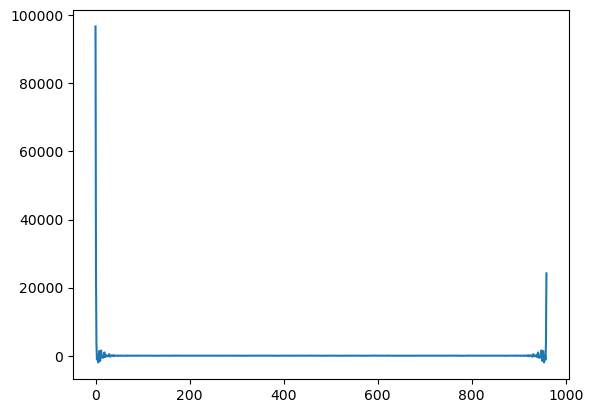

In [43]:
plt.plot(np.real(signal_fft))

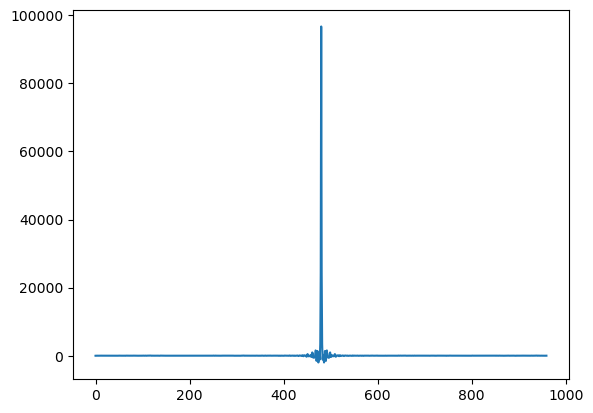

In [42]:
plt.plot(np.fft.fftshift(np.real(signal_fft)))

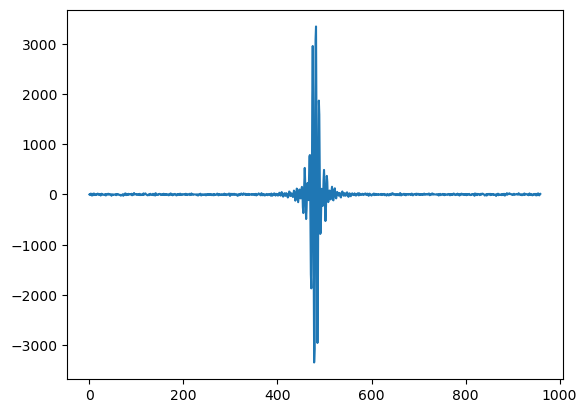

In [45]:
plt.plot(np.fft.fftshift(np.imag(signal_fft)))